In [6]:
import numpy as np
import pandas as pd
from scipy.io import loadmat  # this is the SciPy module that loads mat-files
#!pip install torch torchvision torchaudio
import torch
from torch.utils.data import TensorDataset, DataLoader

import anfis
from membership import BellMembFunc, make_bell_mfs, GaussMembFunc, make_gauss_mfs
from experimental import train_anfis, test_anfis

dtype = torch.float

from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter


%matplotlib inline


In [7]:
# loading data set
data = loadmat('mg.mat')
data = pd.DataFrame(data['x'])
sgn = data.values.reshape(-1,)

In [8]:
#train test
size = len(sgn)
train_s = int(size * 0.8)
test_s = size - train_s
x_train = sgn[:train_s]
x_test = sgn[train_s:]
x_test

array([0.970338, 0.962752, 0.96001 , 0.965206, 0.980626, 1.00675 ,
       1.041302, 1.078822, 1.112006, 1.134987, 1.145864, 1.146365,
       1.139948, 1.130249, 1.120336, 1.112457, 1.107947, 1.10718 ,
       1.109542, 1.113466, 1.116514, 1.115467, 1.106593, 1.08665 ,
       1.054728, 1.013329, 0.967095, 0.920603, 0.877212, 0.838948,
       0.806712, 0.780472, 0.75944 , 0.742312, 0.727581, 0.713911,
       0.700463, 0.687149, 0.674774, 0.665176, 0.661327, 0.667154,
       0.686467, 0.720869, 0.768074, 0.822677, 0.878826, 0.932298,
       0.980915, 1.023994, 1.061635, 1.094225, 1.122167, 1.145783,
       1.165352, 1.181208, 1.193893, 1.204334, 1.21397 , 1.224688,
       1.238262, 1.255129, 1.27294 , 1.286218, 1.288448, 1.275486,
       1.247173, 1.206257, 1.156501, 1.101449, 1.043964, 0.98619 ,
       0.929644, 0.875333, 0.823826, 0.775291, 0.729516, 0.685997,
       0.644176, 0.60381 , 0.565257, 0.529468, 0.497807, 0.471979,
       0.454183, 0.447334, 0.455022, 0.480671, 0.525599, 0.586

### Training for 500 epochs, training size = 782 cases
epoch    0: MSE=0.00012, RMSE=0.01083 =inf%
epoch   10: MSE=0.00011, RMSE=0.01041 =inf%
epoch   20: MSE=0.00011, RMSE=0.01037 =inf%
epoch   30: MSE=0.00010, RMSE=0.01016 =inf%
epoch   40: MSE=0.00010, RMSE=0.01005 =inf%
epoch   50: MSE=0.00010, RMSE=0.00994 =inf%
epoch   60: MSE=0.00009, RMSE=0.00952 =inf%
epoch   70: MSE=0.00009, RMSE=0.00957 =inf%
epoch   80: MSE=0.00009, RMSE=0.00944 =inf%
epoch   90: MSE=0.00008, RMSE=0.00917 =inf%
epoch  100: MSE=0.00008, RMSE=0.00907 =inf%
epoch  110: MSE=0.00008, RMSE=0.00896 =inf%
epoch  120: MSE=0.00008, RMSE=0.00874 =inf%
epoch  130: MSE=0.00007, RMSE=0.00839 =inf%
epoch  140: MSE=0.00006, RMSE=0.00800 =inf%
epoch  150: MSE=0.00006, RMSE=0.00757 =inf%
epoch  160: MSE=0.00005, RMSE=0.00707 =inf%
epoch  170: MSE=0.00004, RMSE=0.00647 =inf%
epoch  180: MSE=0.00003, RMSE=0.00576 =inf%
epoch  190: MSE=0.00002, RMSE=0.00499 =inf%
epoch  200: MSE=0.00002, RMSE=0.00423 =inf%
epoch  210: MSE=0.000

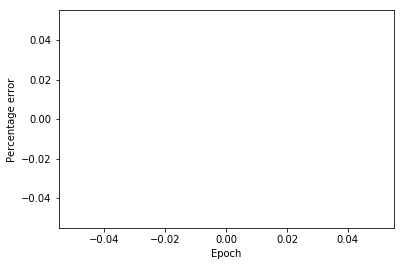

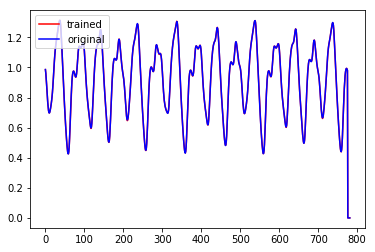

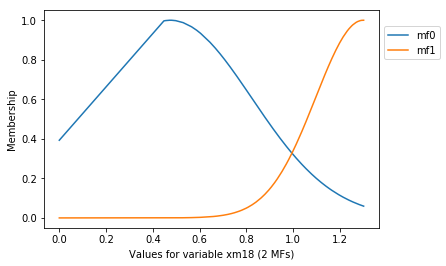

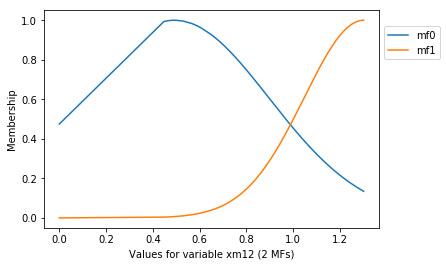

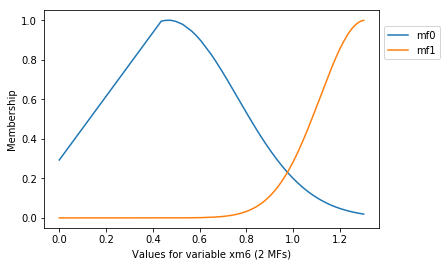

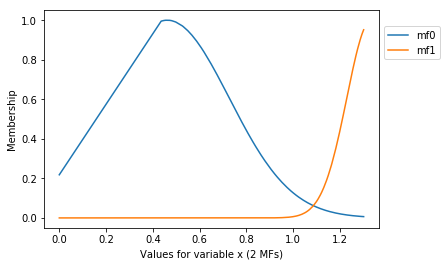

### Testing for 183 cases
MS error=0.00000, RMS error=0.00163, percentage=inf%


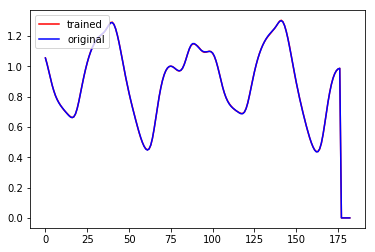

In [9]:
# ##### Example 4: predicting Chaotic Dynamics #####

def ex4_model():
    '''
        Example 4 model, from Jang's data; 4 variables with 2 MFs each.
        Predict x(t+6) based on x(t-18), x(t-12), x(t-6), x(t)
        These are the starting MFs values he suggests.
    '''
    invardefs = [
            ('xm18', make_gauss_mfs(0.1, [0.425606, 1.313696])),
            ('xm12', make_gauss_mfs(0.1, [0.425606, 1.313696])),
            ('xm6',  make_gauss_mfs(0.1, [0.425606, 1.313696])),
            ('x',    make_gauss_mfs(0.1, [0.425606, 1.313696])),
            ]
    outvars = ['xp6']
    model = anfis.AnfisNet('Jang\'s example 4', invardefs, outvars)
    return model


def our_data(data):
    num_cases = len(data) - 18
    x = torch.zeros((num_cases, 4))
    y = torch.zeros((num_cases, 1))
    for t in range(18, len(data)-6):
            values = [data[t-18],data[t-12],data[t-6],data[t],data[t+6]]
            x[t-18] = torch.tensor(values[0:4])
            y[t-18] = values[4]
    dl = DataLoader(TensorDataset(x, y), batch_size=1024, shuffle=True)
    return dl


model = ex4_model()
train_data = our_data(x_train)
train_anfis(model, train_data, 500, True)
test_data = our_data(x_test)
test_anfis(model, test_data, True)


In [36]:
v = [1,2,3,4,5]
v[4]

5